# Sanity Checks: Data Ingest + Alignment

This notebook validates that:
- Market data is daily and clean (no unexpected gaps)
- Macro data is converted to daily using an explicit publication lag (no lookahead)
- Market + macro share the same calendar after alignment

**Note:** This project is a systems-level comparison. No alpha claims, no parameter optimization.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.io import load_parquet

## Load Interim Datasets

Interim datasets are saved before any feature engineering:
- `market_daily.parquet`: raw market series (SPY close, SPY volume, VIX close)
- `macro_daily.parquet`: lagged + forward-filled daily macro series

In [38]:
market = load_parquet("interim/market_daily.parquet")
macro  = load_parquet("interim/macro_daily.parquet")

market.head(), macro.head()

(            close_SPY  close_XLB  close_XLE  close_XLF  close_XLI  close_XLK  \
 Date                                                                           
 2000-01-03   145.4375  12.984375  13.281250  18.582453  28.843750  27.718750   
 2000-01-04   139.7500  12.859375  13.031250  17.770105  28.046875  26.312500   
 2000-01-05   140.0000  13.390625  13.375000  17.630484  27.921875  25.921875   
 2000-01-06   137.7500  13.734375  13.890625  18.404753  28.296875  25.062500   
 2000-01-07   145.7500  13.726563  14.039063  18.709383  29.375000  25.500000   
 
             close_XLP  close_XLU  close_XLV  close_XLY  ...  volume_XLB  \
 Date                                                    ...               
 2000-01-03  22.750000  13.726563  30.296875  15.062500  ...      281000   
 2000-01-04  22.109375  13.312500  29.609375  14.609375  ...      516000   
 2000-01-05  22.500000  13.648438  29.343750  14.429688  ...      205400   
 2000-01-06  22.921875  13.625000  29.437500  14.59

In [39]:
print(market.shape, macro.shape)
print("Market date range:", market.index.min(), "->", market.index.max())
print("Macro date range:", macro.index.min(), "->", macro.index.max())

assert market.index.equals(macro.index), "Market and macro indices should match after alignment."

(6527, 21) (6527, 2)
Market date range: 2000-01-03 00:00:00 -> 2025-12-15 00:00:00
Macro date range: 2000-01-03 00:00:00 -> 2025-12-15 00:00:00


## Visual Diagnostics

These plots are not “results.” They are checks for:
- plausible relationships (e.g., VIX tends to rise during equity drawdowns)
- correct frequency (daily market series)
- step-like macro behavior (monthly values forward-filled after release)

In [40]:
plt.figure()
plt.plot(market.index, market["close_equity"])
plt.title("Equity Close (SPY)")
plt.show()

plt.figure()
plt.plot(market.index, market["vix_close"])
plt.title("VIX Close")
plt.show()

KeyError: 'close_equity'

<Figure size 640x480 with 0 Axes>

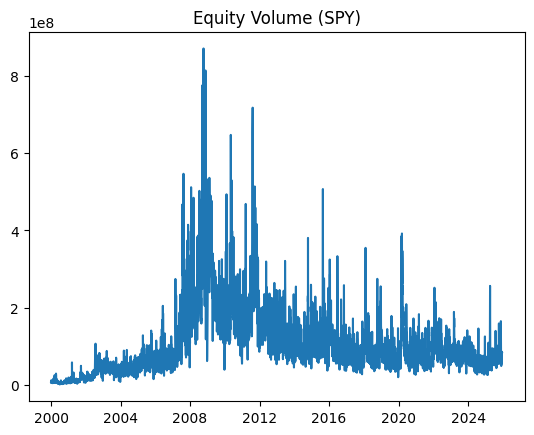

In [ ]:
plt.figure()
plt.plot(market.index, market["volume_equity"])
plt.title("Equity Volume (SPY)")
plt.show()

## Macro Availability (No Lookahead)

Macro series are only “known” after a conservative publication lag.
We expect the daily macro series to:
- change infrequently (monthly step behavior)
- never jump early relative to its release timing

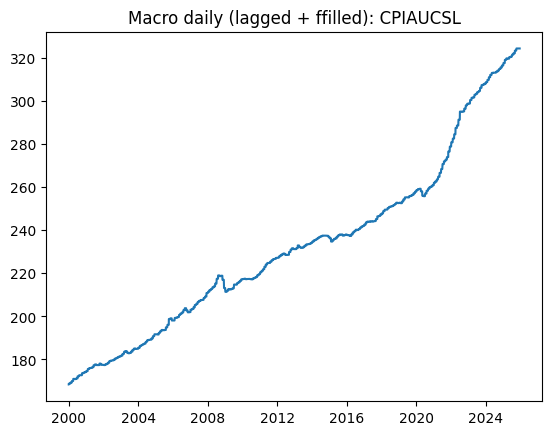

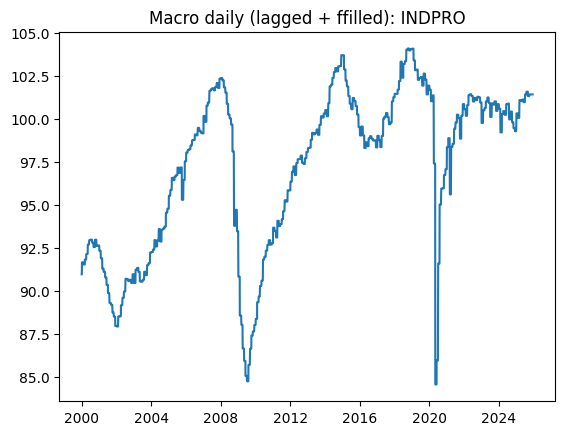

In [ ]:
for col in macro.columns:
    plt.figure()
    plt.plot(macro.index, macro[col])
    plt.title(f"Macro daily (lagged + ffilled): {col}")
    plt.show()

In [ ]:
print("Initial NaNs per macro series:\n", macro.isna().sum())

Initial NaNs per macro series:
 CPIAUCSL    0
INDPRO      0
dtype: int64
